# Basic Usage

This section is going to take you through a whirlwind through of all of [**priwo**](https://github.com/astrogewgaw/priwo)'s capabilities, so hang on tight! [**priwo**](https://github.com/astrogewgaw/priwo) comes with a couple of simple functions that give you, the user, some information about itself, such as what is the maximum chunk size that it uses for reading large amounts of data, or what are the data formats that it supports. [**priwo**](https://github.com/astrogewgaw/priwo) can report stuff like this two ways: directly via the command line(note that the exclamation mark at the beginning allows us to run shell commands in a Jupyter notebook):

In [1]:
!priwo max

╭──────────────────────────╮
│ Maximum size:     0.5 GB │
╰──────────────────────────╯


In [2]:
!priwo available

                          Formats available in priwo.                           
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Format name ┃ Common extension (if any) ┃ Description                        ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ inf         │ .inf                      │ PRESTO metadata.                   │
│ sigproc     │                           │ SIGPROC metadata.                  │
│ dat         │ .dat                      │ PRESTO time series data.           │
│ tim         │ .tim                      │ SIGPROC time series data.          │
│ fft         │ .fft                      │ PRESTO power/frequency spectrum    │
│             │                           │ data.                              │
│ spc         │ .spc                      │ SIGPROC power/frequency spectrum   │
│             │                           │ data.                              │
│ filterbank  │ .fil        

or, programatically, via the `max_size` and `available_formats` functions:

In [3]:
import priwo

priwo.max_size()

╭──────────────────────────╮
│ Maximum size:     0.5 GB │
╰──────────────────────────╯

In [4]:
priwo.available_formats()

                                 Formats available in priwo.                                 
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Format name   ┃ Common extension (if any)    ┃ Description                                ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ inf           │ .inf                         │ PRESTO metadata.                           │
│ sigproc       │                              │ SIGPROC metadata.                          │
│ dat           │ .dat                         │ PRESTO time series data.                   │
│ tim           │ .tim                         │ SIGPROC time series data.                  │
│ fft           │ .fft                         │ PRESTO power/frequency spectrum data.      │
│ spc           │ .spc                         │ SIGPROC power/frequency spectrum data.     │
│ filterbank    │ .fil                         │ SIGPROC frequency-time data.               │
│ psrfits       │                              │ PSRFITS format.                            │
│ pfd           │ .pfd                         │ PRESTO folded data.                        │
│ polycos       │ .polycos                     │ Polynomial coefficients.                   │
│ bestprof      │ .bestprof                    │ PRESTO best profile data.                  │
└───────────────┴──────────────────────────────┴────────────────────────────────────────────┘

As you can see, [**priwo**](https://github.com/astrogewgaw/priwo) supports quite a few pulsar data formats. If you want to read in data from any of them, just import the corresponding function. All function names in [**priwo**](https://github.com/astrogewgaw/priwo) have the format: read_*extension*. For instance, to read in a `*.dat` file, you can do:

In [5]:
from priwo import read_dat

ts = read_dat("data/Lband_DM62.00.dat")
ts

{'bsname': 'tempdir/Lband_DM62.00',
 'telescope': 'GBT',
 'instrument': 'unset',
 'object': 'Mystery_PSR',
 'rastr': '16:43:38.1000',
 'decstr': '-12:24:58.7000',
 'observer': 'unset',
 'mjd': 53010.48095599331,
 'bary': True,
 'nsamp': 134400,
 'tsamp': 0.000288,
 'breaks': True,
 'emband': 'Radio',
 'bdiam': 530.0,
 'dm': 62.0,
 'cfreq': 1352.5,
 'bw': 96.0,
 'nchan': 96,
 'chanwid': 1.0,
 'analyst': 'maximus',
 'notes': ['Project ID unset, Date: 2004-01-06T11:38:09.',
  '2 polns were summed.  Samples have 4 bits.'],
 'onoffs': [(0, 131406), (134399, 134399)],
 'data': array([738., 801., 774., ...,   0.,   0.,   0.], dtype=float32)}

The data from the time series file is in the *data* key. We can take a look at what our time series looks like, using [**matplotlib**](https://matplotlib.org/):

Text(0.5, 1.0, 'Mystery_PSR')

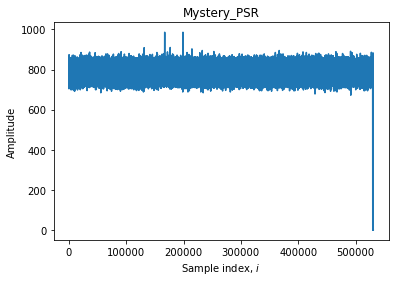

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(ts["data"])
plt.xlabel("Sample index, $i$")
plt.ylabel("Amplitude")
plt.title(ts["object"])